In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def fibonacci(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

In [3]:
def fibonacci_2(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        a=1
        b=0
        for i in range(n):
            temp = a
            a=a+b
            b=temp
    return b
            

In [4]:
def stopwatch(f, N):
    enes = []
    tiempos = []
    for i in range(N+1):
        init = time.time()
    
        f(i)
    
        difference_time = time.time() - init
        enes.append(i)
        tiempos.append(difference_time)
    return np.array(enes), np.array(tiempos)

In [5]:
n1, t1 = stopwatch(fibonacci,40)

In [6]:
n2, t2 = stopwatch(fibonacci_2, 50)

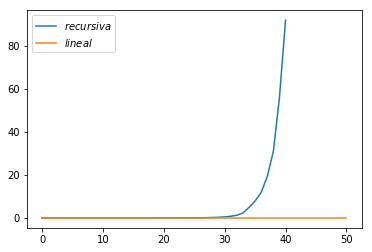

In [7]:
plt.plot(n1, t1, label='$recursiva$')
plt.plot(n2, t2, label='$lineal$')
plt.legend()

In [8]:
def f_lineal(x, a, b):
    return a*x + b
def f_poli(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d
def f_exp(x,a,b):
    return a*np.exp(b*x)

### Fit para el fibonacci recursivo

In [15]:
popt_lineal, pcov_lineal = curve_fit(f_lineal, n1, t1)
popt_poli, pcov_poli = curve_fit(f_poli, n1, t1)
popt_exp, pcov_exp = curve_fit(f_exp, n1, t1, p0=[1.0, 0.1])

In [16]:
popt_exp

array([9.15822633e-08, 5.18247988e-01])

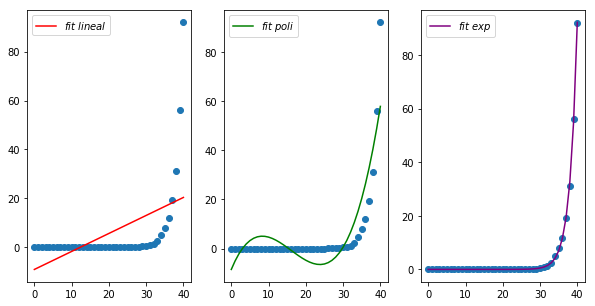

In [17]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(131)
ax.scatter(n1, t1)
ax.plot(n1, f_lineal(n1, *popt_lineal), label='$fit\ lineal$', c='r')
ax.legend()

ax2 = fig.add_subplot(132)
ax2.scatter(n1, t1)
ax2.plot(n1, f_poli(n1, *popt_poli), label='$fit\ poli$', c='g')
ax2.legend()

ax3 = fig.add_subplot(133)
ax3.scatter(n1, t1)
ax3.plot(n1, f_exp(n1, *popt_exp), label='$fit\ exp$', c='purple')
ax3.legend()


### Fit para el fibonacci lineal

In [18]:
popt_lineal_2, pcov_lineal_2 = curve_fit(f_lineal, n2, t2)
popt_poli_2, pcov_poli_2 = curve_fit(f_poli, n2, t2)
popt_exp_2, pcov_exp_2 = curve_fit(f_exp, n2, t2, p0=[0.1,0.1])

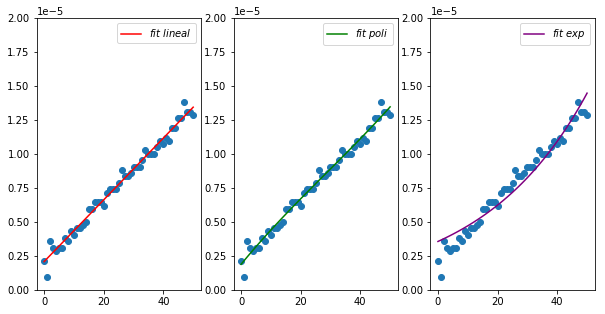

In [30]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(131)
ax.scatter(n2, t2)
ax.plot(n2, f_lineal(n2, *popt_lineal_2), label='$fit\ lineal$', c='r')
ax.legend()
ax.set_ylim(0,0.00002)
ax.ticklabel_format(axis='y', style= 'sci', scilimits=(-3,3))

ax2 = fig.add_subplot(132)
ax2.scatter(n2, t2)
ax2.plot(n2, f_poli(n2, *popt_poli_2), label='$fit\ poli$', c='g')
ax2.legend()
ax2.set_ylim(0,0.00002)
ax2.ticklabel_format(axis='y', style= 'sci', scilimits=(-3,3))

ax3 = fig.add_subplot(133)
ax3.scatter(n2, t2)
ax3.plot(n2, f_exp(n2, *popt_exp_2), label='$fit\ exp$', c='purple')
ax3.legend()
ax3.set_ylim(0,0.00002)
ax3.ticklabel_format(axis='y', style= 'sci', scilimits=(-3,3))


In [33]:
def variance(data):
    return np.mean((data - np.mean(data))**2)
def R_squared(y_data, y_fit):
    return 1 - variance(y_fit - y_data)/variance(y_data)

### $R²$ fits Fibonacci recursivo

In [34]:
R2_lineal = R_squared(t1, f_lineal(n1, *popt_lineal))
R2_poli = R_squared(t1, f_poli(n1, *popt_poli))
R2_exp = R_squared(t1, f_exp(n1, *popt_exp))

In [35]:
print(R2_lineal, R2_poli, R2_exp)

0.2620664292097873 0.7770258086041459 0.9994920354680752


### $R²$ fits Fibonacci lineal

In [36]:
R2_lineal_2 = R_squared(t2, f_lineal(n2, *popt_lineal_2))
R2_poli_2 = R_squared(t2, f_poli(n2, *popt_poli_2))
R2_exp_2 = R_squared(t2, f_exp(n2, *popt_exp_2))

In [37]:
print(R2_lineal_2, R2_poli_2, R2_exp_2)

0.9856168584553908 0.985973687239077 0.948700990879807


### $3-\sigma$ plots

#### Fibonacci recursivo

In [38]:
var_lineal = np.diag(pcov_lineal)
var_poli = np.diag(pcov_poli)
var_exp = np.diag(pcov_exp)

Text(0.5, 1.0, '$3-\\sigma$ fit exponencial')

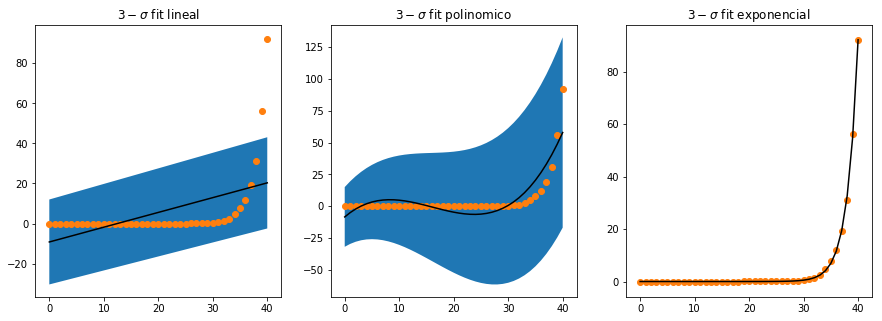

In [50]:
fig2 = plt.figure(figsize=(15,5))
ax = fig2.add_subplot(131)
ax.plot(n1, f_lineal(n1, *popt_lineal), 'k-')
ax.fill_between(n1, f_lineal(n1, *popt_lineal - var_lineal), f_lineal(n1, *popt_lineal + var_lineal))
ax.scatter(n1,t1)
ax.set_title('$3-\sigma$ fit lineal')

ax2 = fig2.add_subplot(132)
ax2.plot(n1, f_poli(n1, *popt_poli), 'k-')
ax2.fill_between(n1, f_poli(n1, *popt_poli - var_poli), f_poli(n1, *popt_poli + var_poli))
ax2.scatter(n1,t1)
ax2.set_title('$3-\sigma$ fit polinomico')

ax3 = fig2.add_subplot(133)
ax3.plot(n1, f_exp(n1, *popt_exp), 'k-')
ax3.fill_between(n1, f_exp(n1, *popt_exp - var_exp), f_exp(n1, *popt_exp + var_exp))
ax3.scatter(n1,t1)
ax3.set_title('$3-\sigma$ fit exponencial')


#### Fibonacci lineal

In [51]:
var_lineal_2 = np.diag(pcov_lineal_2)
var_poli_2 = np.diag(pcov_poli_2)
var_exp_2 = np.diag(pcov_exp_2)

In [57]:
var_lineal_2

array([1.53818772e-17, 1.29464136e-14])

Text(0.5, 1.0, '$3-\\sigma$ fit exponencial')

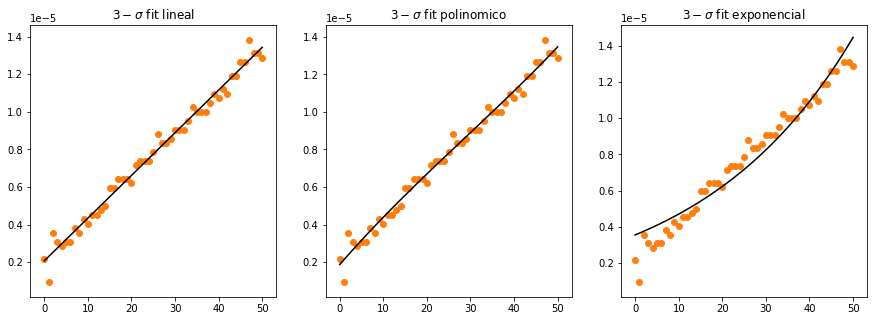

In [54]:
fig3 = plt.figure(figsize=(15,5))
ax = fig3.add_subplot(131)
ax.plot(n2, f_lineal(n2, *popt_lineal_2), 'k-')
ax.fill_between(n2, f_lineal(n2, *popt_lineal_2 - var_lineal_2), f_lineal(n2, *popt_lineal_2 + var_lineal_2))
ax.scatter(n2,t2)
ax.ticklabel_format(axis='y', style= 'sci', scilimits=(-3,3))
ax.set_title('$3-\sigma$ fit lineal')

ax2 = fig3.add_subplot(132)
ax2.plot(n2, f_poli(n2, *popt_poli_2), 'k-')
ax2.fill_between(n2, f_poli(n2, *popt_poli_2 - var_poli_2), f_poli(n2, *popt_poli_2 + var_poli_2))
ax2.scatter(n2,t2)
ax2.ticklabel_format(axis='y', style= 'sci', scilimits=(-3,3))
ax2.set_title('$3-\sigma$ fit polinomico')

ax3 = fig3.add_subplot(133)
ax3.plot(n2, f_exp(n2, *popt_exp_2), 'k-')
ax3.fill_between(n2, f_exp(n2, *popt_exp_2 - var_exp_2), f_exp(n2, *popt_exp_2 + var_exp_2))
ax3.scatter(n2,t2)
ax3.ticklabel_format(axis='y', style= 'sci', scilimits=(-3,3))
ax3.set_title('$3-\sigma$ fit exponencial')


## Punto 2

In [106]:
def Gausian_2D(x,y,mu_x,mu_y,sigma_x,sigma_y):
    return 1.0/(2*np.pi*sigma_x*sigma_y)*np.exp(-0.5*
                                                ((x-mu_x)**2/sigma_x**2)
                                                - 0.5*
                                                ((y-mu_y)**2/sigma_y**2))

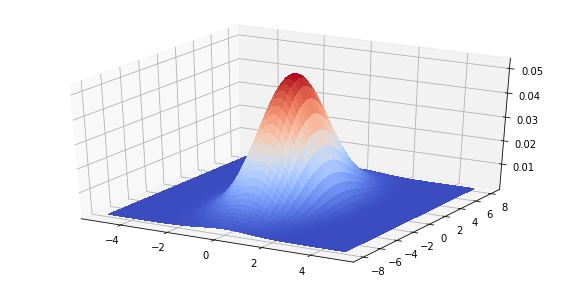

In [107]:
x=np.linspace(-5,5,1000)
y=np.linspace(-8,8,1000)
X,Y=np.meshgrid(x,y)
z=Gausian_2D(X,Y,0,0,1,3)

fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, z, cmap='coolwarm',linewidth=0, antialiased=False)

plt.show()

In [108]:
np.shape(z)

(1000, 1000)

In [109]:
z_noise = z + np.random.normal(loc=0.0, scale=0.003, size=np.shape(z))

In [110]:
np.shape(z_noise)

(1000, 1000)

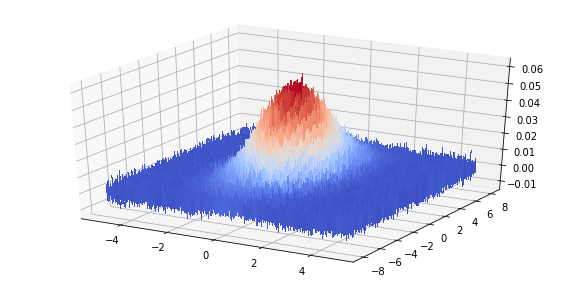

In [111]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, z_noise, cmap='coolwarm',linewidth=0, antialiased=False)

plt.show()

In [112]:
def flat_Gausian_2D(tup,mu_x,mu_y,sigma_x,sigma_y):
    return 1.0/(2*np.pi*sigma_x*sigma_y)*np.exp(-0.5*
                                                ((tup[0]-mu_x)**2/sigma_x**2)
                                                - 0.5*
                                                ((tup[1]-mu_y)**2/sigma_y**2))

In [113]:
popt, pcov = curve_fit(flat_Gausian_2D, (X.flatten('C'), Y.flatten('C')), z_noise.flatten('C'))

In [114]:
popt

array([4.77084376e-06, 1.06484699e-03, 1.00004152e+00, 3.00011216e+00])

In [115]:
popt_2, pcov_2 = curve_fit(flat_Gausian_2D, (X.flatten('C'), Y.flatten('C')), z_noise.flatten('C'), p0=[0,0,1,3])

In [116]:
popt_2

array([4.11708330e-06, 1.06473173e-03, 1.00004148e+00, 3.00011253e+00])

<a list of 6 text.Text objects>

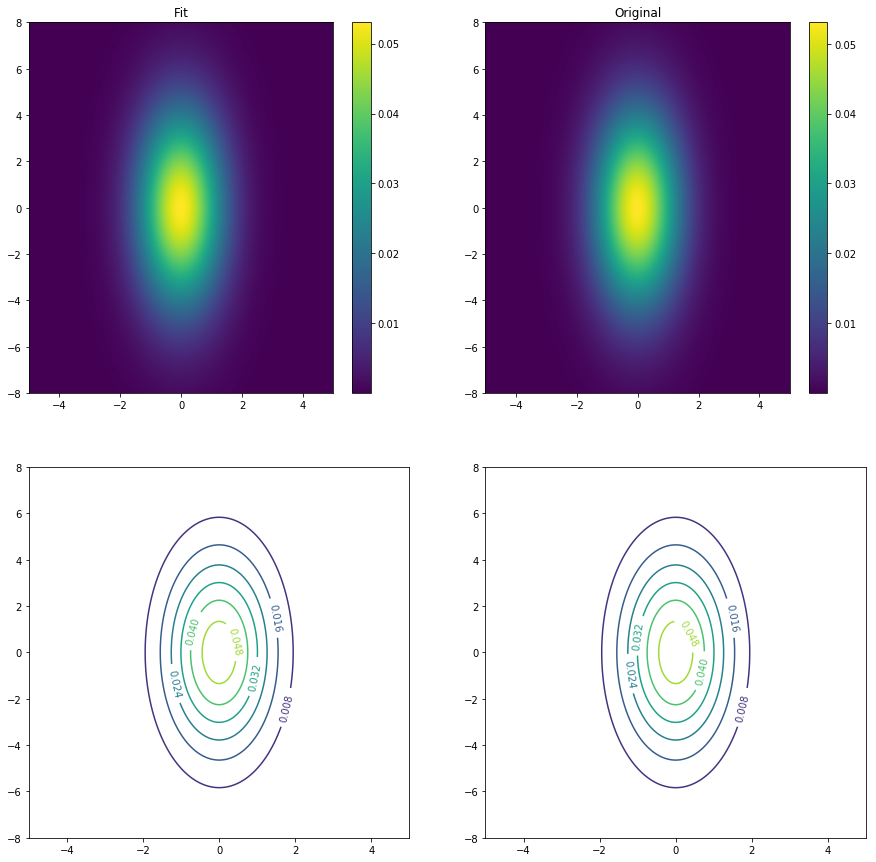

In [122]:
z_fit = Gausian_2D(X,Y,*popt_2)

figurine = plt.figure(figsize=(15,15))

ax0 = figurine.add_subplot(221)
im = ax0.pcolormesh(X,Y,z_fit)
figurine.colorbar(im, ax=ax0)
ax0.set_title('Fit')

ax1 = figurine.add_subplot(222)
im2 = ax1.pcolormesh(X,Y,z)
figurine.colorbar(im2, ax=ax1)
ax1.set_title('Original')

ax2 = figurine.add_subplot(223)
CS = ax2.contour(X, Y, z_fit)
ax2.clabel(CS, inline=1, fontsize=10)

ax3 = figurine.add_subplot(224)
CS2 = ax3.contour(X, Y, z)
ax3.clabel(CS2, inline=1, fontsize=10)

